In [1]:
#동적 생성되는 data 크롤링
#Selenium 모듈 사용
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import selenium
from selenium import webdriver

### 관련 메서드
- get(url) : url에 접근하는 메서드
    
#### 페이지 단일 element에 접근하는 메서드
- find_element_by_name('html_name')
- find_element_by_id('html_id')
- find_element_by_xpath('패스경로') : 스크립트 실행 경로를 찾아 접근
    
    
#### 페이지의 여러 element에 접근하는 메서드
- find_element_by_class_selector('html slelctor')
- find_element_by_class_name('html_class')
- find_element_by_tag_name('htm tag')

#### Webdriver 객체 생성
- driver = webdriver.Chrome(드라이버경로)

#### 접근한 페이지 source 추출
- html=diver.page_source

In [7]:
# 크롬 드라이버를 통한 네이버 접속

driver = webdriver.Chrome("./driver/chromedriver")
driver.get("https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=001&aid=0012587876")
driver.close()

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"><head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta name="viewport" content="width=1106">\n<title>혼자 집에 둔 3살 딸 사망…시신 발견하고도 도망친 엄마 : 네이버 뉴스</title>\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\n\t\t\n\t\t\n\t\t\n\t\n\t\n\n<meta property="me2:post_tag" content="연합뉴스 : 네이버뉴스">\n<meta property="me2:category1" content="연합뉴스">\n<meta property="me2:category2" content="사회">\n<meta property="me2:image" content="">\n\n<meta property="og:title" content="혼자 집에 둔 3살 딸 사망…시신 발견하고도 도망친 엄마">\n<meta property="og:type" content="article">\n<meta property="og:url" content="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=sec&amp;oid=001&amp;aid=0012587876&amp;sid1=001">\n<meta property="og:image" content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160
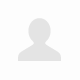
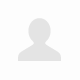

In [6]:
driver.page_source

In [18]:
like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
like_num = [like.text for like in like_list]
like_num

['803']

In [19]:
rep_list = driver.find_elements_by_css_selector("span.lo_txt")
rep_num = [rep.text for rep in rep_list]
rep_num

['465']

In [ ]:
driver = webdriver.Chrome("./driver/chromedriver")
driver.get("https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=001&aid=0012587876")

In [46]:
# 전달된 뉴스 url의 기사에서 기사제목 기사 입력시간을 반환하는 함수

def get_news_sub_info(url):
    
    # 1. 전달된 url에 접속 후 응답객체 반환
    headers = {"user-Agent":
           "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
    result = requests.get(url,headers=headers)
    # 2. bs4 객체 생성
    bs_obj = BeautifulSoup(result.content,"html.parser")
    
    # 3. 필요 데이터 추출
    # 기사 제목 추출(태그 객체)
    title = bs_obj.find(id='articleTitle')
    # 기사 입력 시간 추출(태그 객체)
    time = bs_obj.find("span",{"class":"t11"})
    # 기사 내용 추출
    content = bs_obj.find(id='articleBodyContents')
    # 4.
    #time.sleep(2)
    #driver = webdriver.Chrome("./driver/chromedriver")
    driver.get(url)
    driver.page_source
    
    like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
    like_num = [like.text for like in like_list]
    print(like_list)
    rep_list = driver.find_elements_by_css_selector("span.lo_txt")
    rep_num = [rep.text for rep in rep_list]
    print(rep_list)
    
    # 5. 수집 데이터 dict로 구성 후 반환
    dict_sub = {}
    dict_sub["기사제목"] = title.text
    dict_sub["기사 입력 시간"] = time.text
    dict_sub['좋아요 수'] = like_num
    dict_sub['댓글 수'] = rep_num
    #dict_sub["기사 내용"] = content.text.strip()
    
    return dict_sub

In [47]:
url = "https://news.naver.com"
headers={"User-Agent":
             "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
result = requests.get(url,headers=headers)

bs_obj = BeautifulSoup(result.content,"html.parser")

#ul 태그 추출 : class:hdline_article_list
news_list = bs_obj.find("ul",{"class":"hdline_article_list"})
#모든 li 추출
lis = news_list.findAll("li")

#헤드라인뉴스 link 저장 - list
link_list=[]
for li in lis :
    a_tag = li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)

driver = webdriver.Chrome("./driver/chromedriver")
import time
for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)
    #time.sleep(2)

['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=008&aid=0004628325', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=214&aid=0001140740', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=437&aid=0000273247', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=028&aid=0002555918', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=277&aid=0004950775']
[<selenium.webdriver.remote.webelement.WebElement (session="ff36f92fe378afbf2fc3ea3770050bfc", element="730f4ba0-48e9-44b8-8bfe-8142d44caa23")>]
[<selenium.webdriver.remote.webelement.WebElement (session="ff36f92fe378afbf2fc3ea3770050bfc", element="37dddd96-8350-4c60-b756-10e15594b366")>]
{'기사제목': '남친 만나느라 사흘 집 비운 엄마…쓸쓸히 죽어간 3살 딸', '기사 입력 시간': '2021.08.09. 오후 1:35', '좋아요 수': ['21'], '댓글 수': ['']}
[<selenium.webdriver.remote.webelement.WebElement (session="ff36f92fe378afbf2fc3ea3770050bfc", element="c53ba96a-2ff2-4e4a-8d63-0bfc06459ab

In [38]:
for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)

{'기사제목': '[속보] 2학기에 3단계까지 전면등교…4단계에도 3분의 1이상', '기사 입력 시간': '2021.08.09. 오후 2:44', '좋아요 수': [], '댓글 수': ['']}
{'기사제목': '[시그널] 강성부 "쌍용차, 전기차 진출 더없이 좋은 요건"...에디슨모터스 손잡고 참전', '기사 입력 시간': '2021.08.09. 오전 11:48', '좋아요 수': [], '댓글 수': ['']}
{'기사제목': '부패한 시신으로 발견된 3살 여아…친모 긴급체포', '기사 입력 시간': '2021.08.09. 오전 11:14', '좋아요 수': [], '댓글 수': ['']}
{'기사제목': '생후 2주 아들 살해 친부 징역 25년·친모 징역 7년 선고', '기사 입력 시간': '2021.08.09. 오후 1:17', '좋아요 수': [], '댓글 수': ['']}
{'기사제목': '검찰, 지난해 광복절 불법집회 주도 전광훈 불구속 기소', '기사 입력 시간': '2021.08.09. 오전 11:48', '좋아요 수': [], '댓글 수': ['']}


In [ ]:
# 크롬 드라이버를 통한 네이버 접속

driver = webdriver.Chrome("./driver/chromedriver")
driver.get("https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=001&aid=0012587876")